### Dataset Download

In [20]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Load CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar100.load_data()

### Data Exploration

##### - Check shape

In [3]:
# Check the shape of the training and test sets
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

print("\nImage dimensions:", train_images[0].shape)

Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)

Image dimensions: (32, 32, 3)


##### - Check datatype

In [4]:
# Check the data type
print("Data type of images:", train_images.dtype)
print("Data type of labels:", train_labels.dtype)

Data type of images: uint8
Data type of labels: int32


##### - Check pixel value range

In [5]:
print("Min pixel value in training images:", train_images.min())
print("Max pixel value in training images:", train_images.max())

Min pixel value in training images: 0
Max pixel value in training images: 255


##### - Summary statistics for pixel values

In [6]:
# Calculate mean and standard deviation for pixel values
mean_pixel_value = train_images.mean()
std_pixel_value = train_images.std()

print(f'Mean pixel value: {mean_pixel_value:.2f}')
print(f'Standard deviation of pixel values: {std_pixel_value:.2f}')

Mean pixel value: 121.94
Standard deviation of pixel values: 68.39


##### - Check for missing values

In [7]:
print("Checking for missing values in training images:", np.any(np.isnan(train_images)))
print("Checking for missing values in training labels:", np.any(np.isnan(train_labels)))

Checking for missing values in training images: False
Checking for missing values in training labels: False


##### - Check unique classes

In [9]:
# Convert labels to a 1D array for easier exploration
train_labels_flat = train_labels.flatten()

# Unique classes and their counts
unique_classes, counts = np.unique(train_labels_flat, return_counts=True)
print("Number of unique classes:", len(unique_classes))
print("Counts per class:", dict(zip(unique_classes, counts)))

Number of unique classes: 100
Counts per class: {0: 500, 1: 500, 2: 500, 3: 500, 4: 500, 5: 500, 6: 500, 7: 500, 8: 500, 9: 500, 10: 500, 11: 500, 12: 500, 13: 500, 14: 500, 15: 500, 16: 500, 17: 500, 18: 500, 19: 500, 20: 500, 21: 500, 22: 500, 23: 500, 24: 500, 25: 500, 26: 500, 27: 500, 28: 500, 29: 500, 30: 500, 31: 500, 32: 500, 33: 500, 34: 500, 35: 500, 36: 500, 37: 500, 38: 500, 39: 500, 40: 500, 41: 500, 42: 500, 43: 500, 44: 500, 45: 500, 46: 500, 47: 500, 48: 500, 49: 500, 50: 500, 51: 500, 52: 500, 53: 500, 54: 500, 55: 500, 56: 500, 57: 500, 58: 500, 59: 500, 60: 500, 61: 500, 62: 500, 63: 500, 64: 500, 65: 500, 66: 500, 67: 500, 68: 500, 69: 500, 70: 500, 71: 500, 72: 500, 73: 500, 74: 500, 75: 500, 76: 500, 77: 500, 78: 500, 79: 500, 80: 500, 81: 500, 82: 500, 83: 500, 84: 500, 85: 500, 86: 500, 87: 500, 88: 500, 89: 500, 90: 500, 91: 500, 92: 500, 93: 500, 94: 500, 95: 500, 96: 500, 97: 500, 98: 500, 99: 500}


##### - Get class names

In [10]:
cifar100_dir = tf.keras.utils.get_file(
    "cifar-100-python",
    origin="https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz",
    untar=True
)

# Get class names
for root, dirs, files in os.walk(cifar100_dir):
    print(f"Checking in: {root}")
    for file in files:
        print(file)
        # Look for the 'meta' file
        if file == 'meta':
            meta_file_path = os.path.join(root, file)
            with open(meta_file_path, 'rb') as f:
                data = pickle.load(f, encoding='bytes')
                class_names = [name.decode('utf-8') for name in data[b'fine_label_names']]
            print("Class names:", class_names)
            print("Number of classes:", len(class_names))
            break


Checking in: C:\Users\USER\.keras\datasets\cifar-100-python
Checking in: C:\Users\USER\.keras\datasets\cifar-100-python\cifar-100-python
file.txt~
meta
Class names: ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 

##### - Display sample images with labels

In [11]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup",
    "dinosaur", "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house",
    "kangaroo", "keyboard", "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man",
    "maple_tree", "motorcycle", "mountain", "mouse", "mushroom", "oak_tree", "orange", "orchid",
    "otter", "palm_tree", "pear", "pickup_truck", "pine_tree", "plain", "plate", "poppy", "porcupine",
    "possum", "rabbit", "raccoon", "ray", "road", "rocket", "rose", "sea", "seal", "shark", "shrew",
    "skunk", "skyscraper", "snail", "snake", "spider", "squirrel", "streetcar", "sunflower",
    "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor", "train",
    "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]


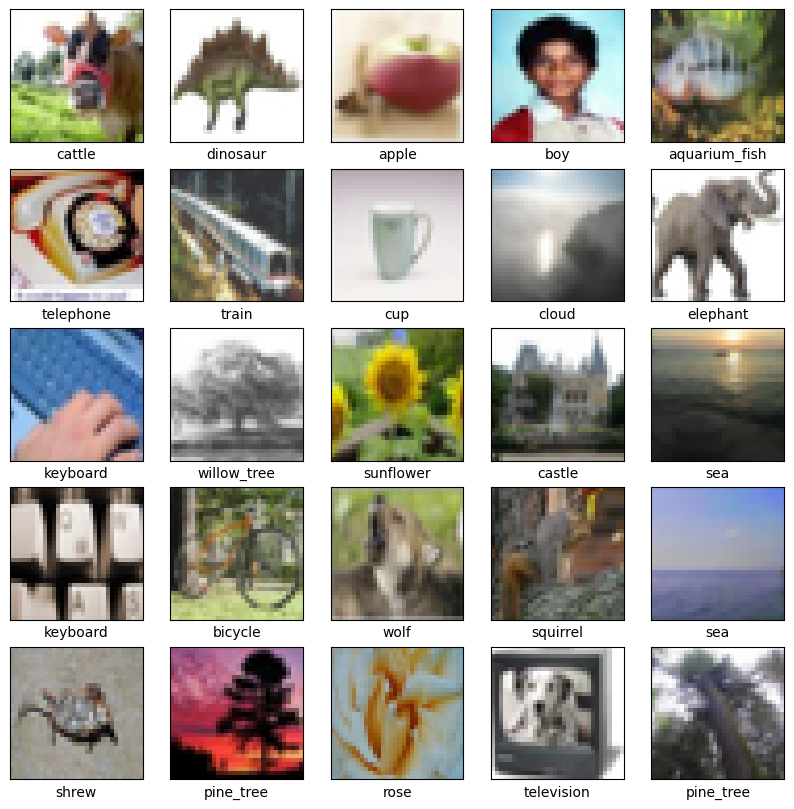

In [12]:
# Display a few sample images with labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])

plt.savefig('cifar100_grid.png', dpi=300, bbox_inches='tight')
plt.show()


##### - Examine label distribution

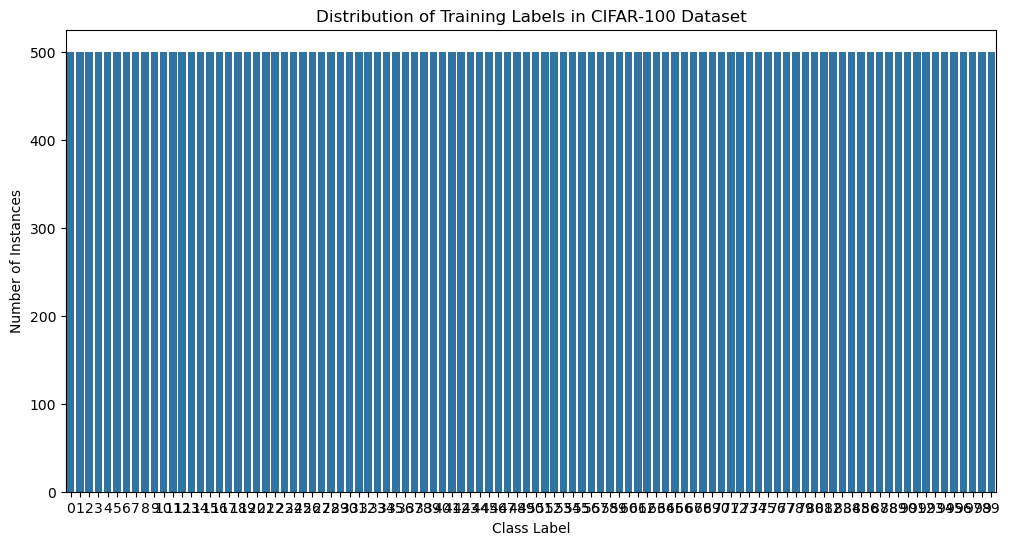

In [16]:
# Convert labels to a 1D array for easier handling
train_labels_flat = train_labels.flatten()
test_labels_flat = test_labels.flatten()

# Count the number of instances for each label in the training set
label_counts = np.bincount(train_labels_flat, minlength=100)

# Plot the distribution of labels
plt.figure(figsize=(12, 6))
sns.barplot(x=np.arange(100), y=label_counts)
plt.xlabel("Class Label")
plt.ylabel("Number of Instances")
plt.title("Distribution of Training Labels in CIFAR-100 Dataset")
plt.show()


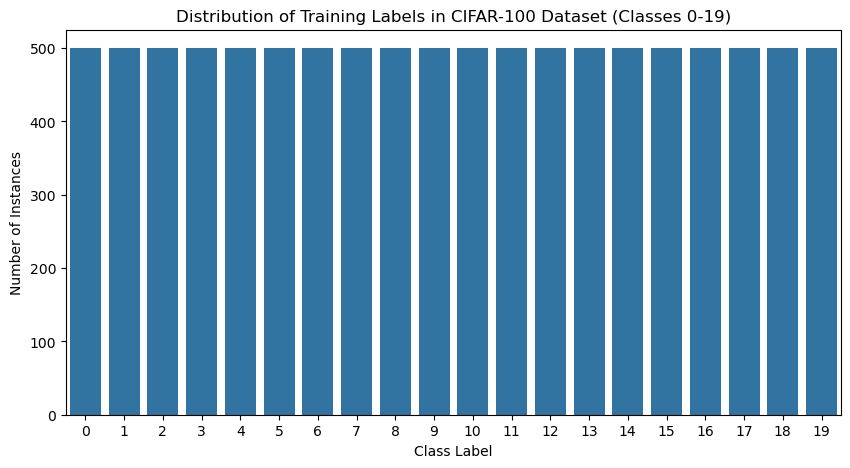

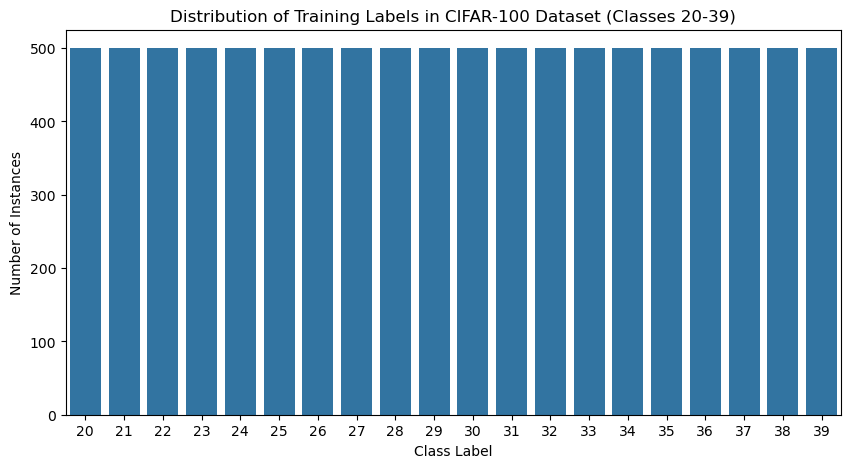

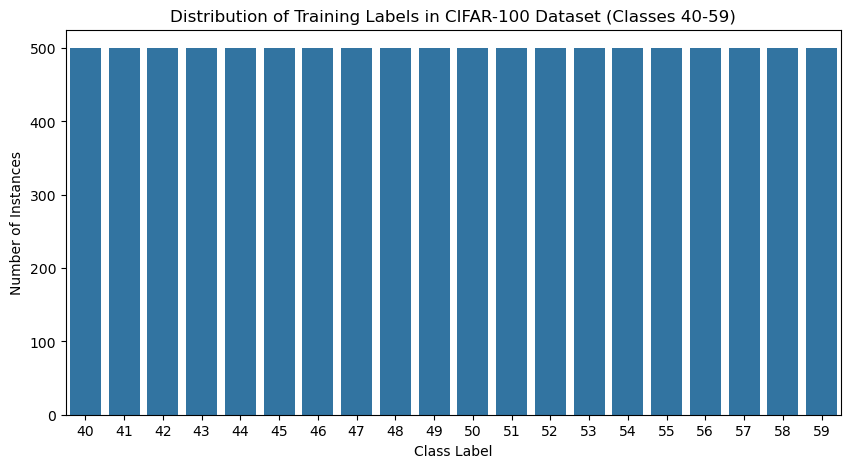

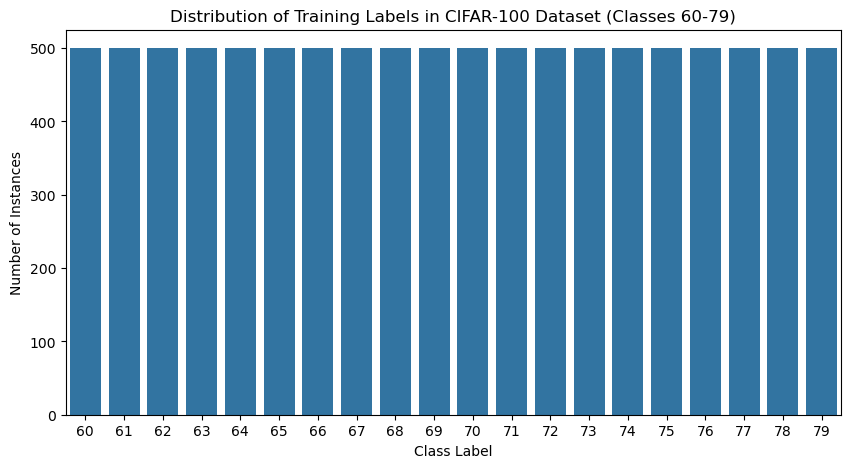

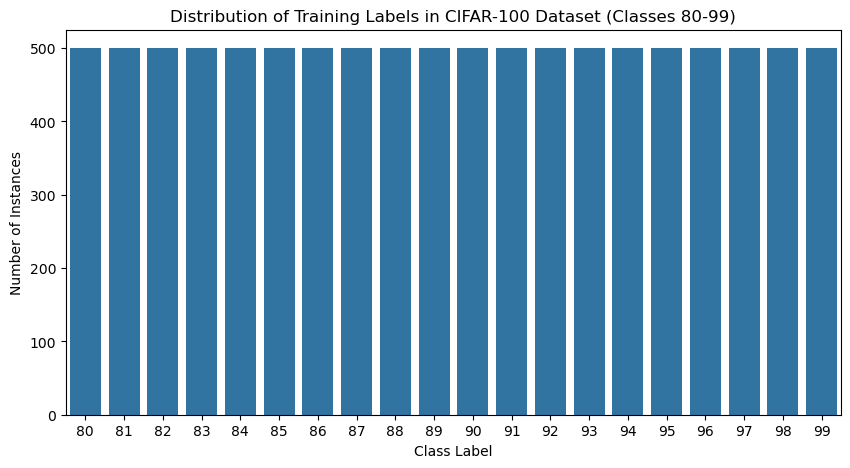

In [17]:
#Convert labels to a 1D array for easier handling
train_labels_flat = train_labels.flatten()

# Count the number of instances for each label in the training set
label_counts = np.bincount(train_labels_flat, minlength=100)

# Define the number of classes to plot at a time
classes_per_plot = 20

# Create plots in chunks
for i in range(0, 100, classes_per_plot):
    # Select the current range of classes to plot
    class_range = np.arange(i, min(i + classes_per_plot, 100))
    class_counts = label_counts[class_range]
    
    # Plot the distribution for the current chunk
    plt.figure(figsize=(10, 5))
    sns.barplot(x=class_range, y=class_counts)
    plt.xlabel("Class Label")
    plt.ylabel("Number of Instances")
    plt.title(f"Distribution of Training Labels in CIFAR-100 Dataset (Classes {i}-{i + classes_per_plot - 1})")

    # Save the plot to a file
    plt.savefig(f"label_distribution_classes_{i}_{i + classes_per_plot - 1}.png")
    
    plt.show()


- The chart shows that each of the classes in the CIFAR-100 dataset has roughly the same number of instances. This indicates that the dataset is relatively balanced for the classes.

#### Data Preprocessing

##### - Data Normalization

In [18]:
# Normalize the dataset
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

##### - Data Augmentation

In [26]:
# Define the output directory for augmented images
output_dir = "augmented_dataset"
os.makedirs(output_dir, exist_ok=True)

#Augmentation setup
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Create a subfolder for each class in the output directory
for i in range(100):
    os.makedirs(os.path.join(output_dir, str(i)), exist_ok=True)

# Generate and save augmented images
num_augmented_images_per_class = 500

for class_index in range(100):  # Loop over each class
    # Select all images belonging to the current class
    class_images = train_images[train_labels.flatten() == class_index]
    class_dir = os.path.join(output_dir, str(class_index))
    
    # Use flow method to generate augmented images
    aug_iter = datagen.flow(class_images, batch_size=1, save_to_dir=class_dir,
                            save_prefix='aug', save_format='png')

    # Generate and save images
    for _ in range(num_augmented_images_per_class):
        next(aug_iter)  # Generate and save one augmented image per iteration


In [25]:
# Define the output directory for augmented images
output_dir = "aug_dataset"
os.makedirs(output_dir, exist_ok=True)

# Augmentation setup
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Create a subfolder for each class in the output directory using class names
for class_name in class_names:
    os.makedirs(os.path.join(output_dir, class_name), exist_ok=True)

# Generate and save augmented images
num_augmented_images_per_class = 500

for class_index, class_name in enumerate(class_names):  # Loop over each class using index and name
    # Select all images belonging to the current class
    class_images = train_images[train_labels.flatten() == class_index]
    class_dir = os.path.join(output_dir, class_name)
    
    # Use the class name as the prefix to save images with the class name
    aug_iter = datagen.flow(
        class_images,
        batch_size=1,
        save_to_dir=class_dir,
        save_prefix=class_name,  # Use class name as prefix
        save_format='png'
    )

    # Generate and save images
    for img_num in range(num_augmented_images_per_class):
        next(aug_iter)  # Generate and save one augmented image per iteration


#### Data Visualization

##### - Visualize some random samples from each class

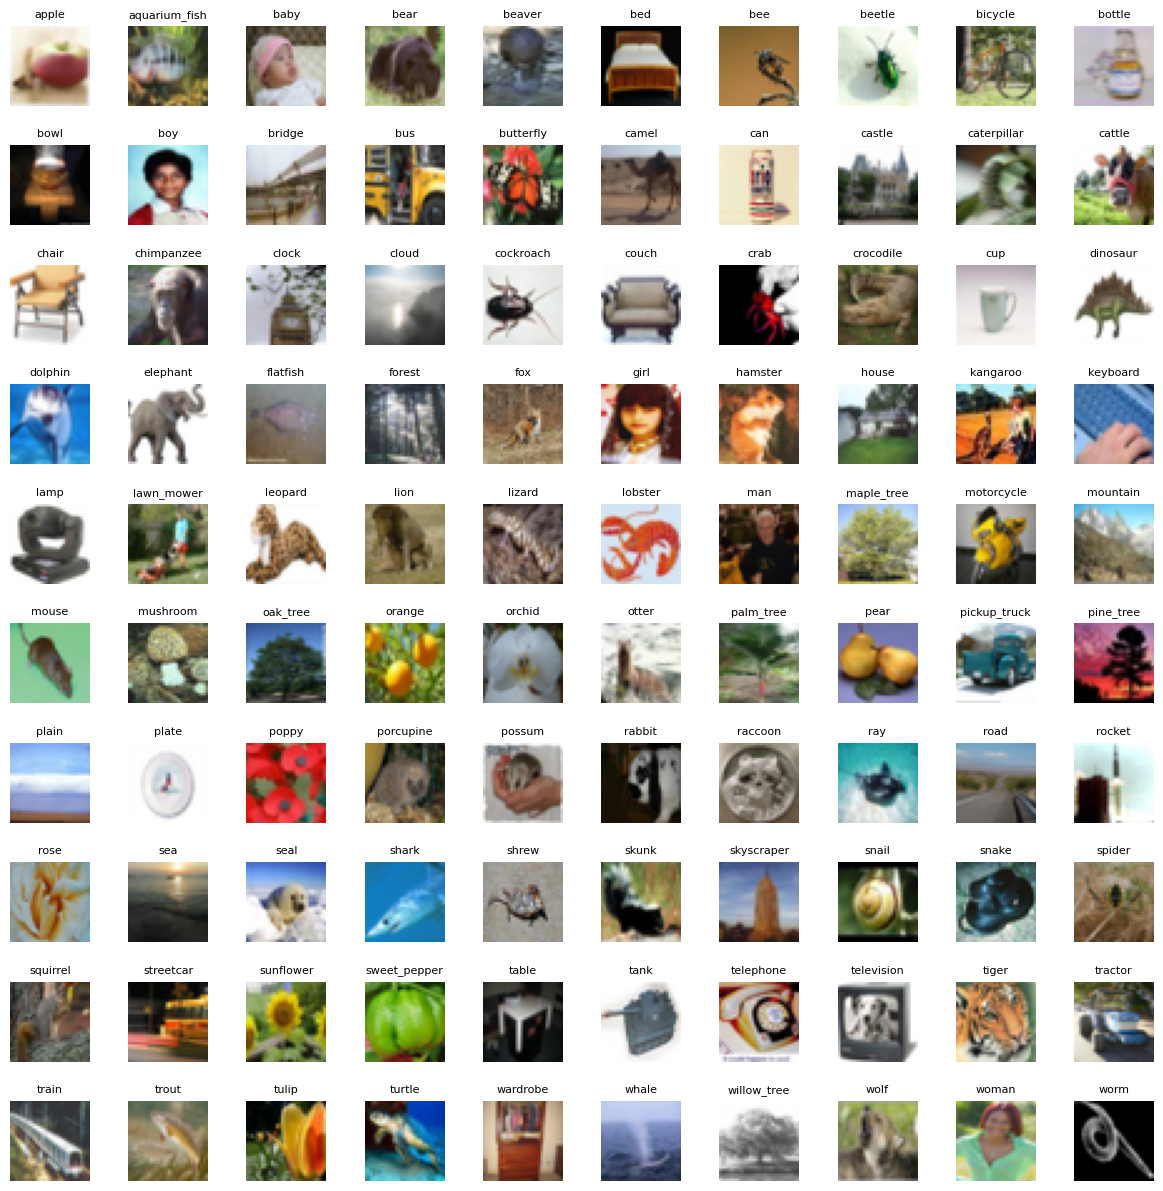

In [27]:
# Plot sample images from the dataset
fig, axes = plt.subplots(10, 10, figsize=(15, 15))
axes = axes.ravel()

for i in range(100):
    index = np.where(train_labels == i)[0][0]
    axes[i].imshow(train_images[index])
    axes[i].set_title(class_names[i], fontsize=8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)
plt.savefig("100_Samples.png")
plt.show()
